In [1]:
import pandas as pd
from prepare import Prepare
from split_get_scale import SplitGetScale
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 30

zillow = Prepare().wrangle_zillow()
sgs = SplitGetScale()

/Users/dragonzord/Documents/SchoolDocs/codeup-data-science/exercises/methodologies1/clustering/zillow_clustering/prepare.py:11: DtypeWarning: Columns (63) have mixed types.Specify dtype option on import or set low_memory=False.
  df = Acquire().get_zillow_data()


In [2]:
train, validate, test = sgs.split(zillow)
(X_train, y_train), (X_validate, y_validate), (X_test, y_test) = sgs.get_Xy(train, validate, test)
X_train_scaled, X_val_scaled, X_test_scaled, _ = sgs.scale(X_train, X_validate, X_test)

In [8]:
# function to get the plot of inertia against K value
def get_k_val_from_elbow(df):
    '''Takes in a dataframe and a list of features to cluster on and returns a plot of K value against the inertia'''
    output = {}

    for k in range(1, 20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        output[k] = kmeans.inertia_

    ax = pd.Series(output).plot(figsize=(13, 7))
    ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 20), title='The elbow method for determining k')
    ax.grid()

### Creating clusters based on location features 

In [9]:
## GET TRAIN, VALIDATE, TEST FOR CLUSTERING
# creating the list of the features to cluster on
loc_features = ['latitude', 'longitude', 'region_id_zip', 'fips']
clusters_train = train[loc_features]
clusters_validate = validate[loc_features]
clusters_test = test[loc_features]

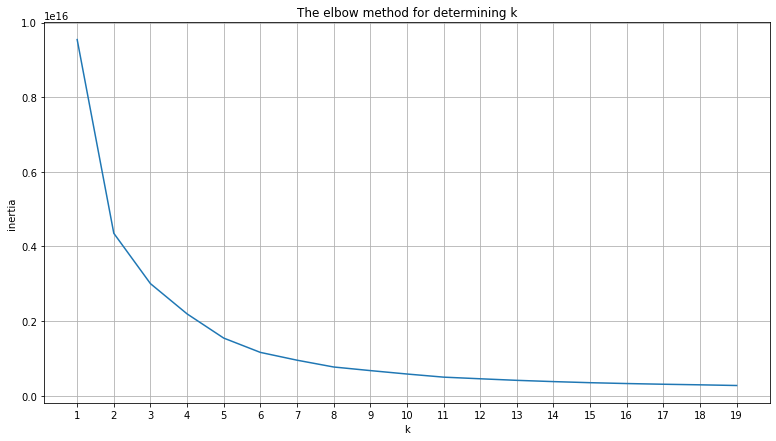

In [10]:
# lets plot the k and inertia
get_k_val_from_elbow(clusters_train)

### Use K = 4

In [11]:
# creating the object
kmeans1 = KMeans(n_clusters=4, max_iter=500)

# fitting the object
kmeans1.fit(clusters_train)

#predicting using the kmeans object
y_kmeans1 = kmeans1.predict(clusters_train)
y_kmeans1 

array([1, 1, 1, ..., 2, 1, 3], dtype=int32)

array([[ 3.46197313e+07, -1.18138361e+08,  9.72826189e+04,
         6.03700000e+03],
       [ 3.40142422e+07, -1.18272013e+08,  9.63102292e+04,
         6.03700000e+03],
       [ 3.42507778e+07, -1.18748739e+08,  9.66076586e+04,
         6.07039268e+03],
       [ 3.37727448e+07, -1.17838576e+08,  9.68256910e+04,
         6.05426467e+03]])

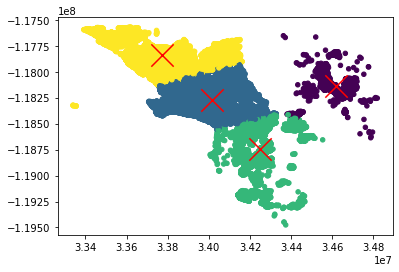

In [12]:
# ploting the centroids
plt.scatter(clusters_train.iloc[:, 0], clusters_train.iloc[:, 1], c=y_kmeans1, s=20, cmap='viridis')
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')
centers

In [13]:
# Adding our prediction to the DataFrame
train['loc_cluster'] = y_kmeans1

In [14]:
train.head(1)

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,region_id_county,region_id_zip,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,transaction_date,county,loc_cluster
13527,11770180,1.0,2,941.0,6037,34012117.0,-118247150.0,6338.0,6.037228e+07,12447,3101,95992,1909,32430.0,72079.0,2016,39649.0,1025.09,6.037228e+13,-0.091213,2017-03-01,Los Angeles,1


### Viz and Stats Test for Location Clusters

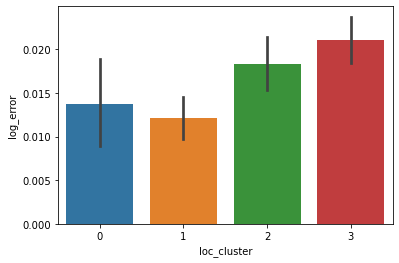

In [15]:
sns.barplot(x=train["loc_cluster"], y=train["log_error"]);

<p>H_o: all 4 groups have the same population mean</p>
<p>H_a: at least 1 has different mean</p>
<p>Signifcance Level: 0.05</p>

In [16]:
from scipy.stats import f_oneway

loc_cluster_0 = train["log_error"][train["loc_cluster"] == 0]
loc_cluster_1 = train["log_error"][train["loc_cluster"] == 1]
loc_cluster_2 = train["log_error"][train["loc_cluster"] == 2]
loc_cluster_3 = train["log_error"][train["loc_cluster"] == 3]

f, p = f_oneway(loc_cluster_0, loc_cluster_1, loc_cluster_2, loc_cluster_3, axis=0)
f, p

(9.403702702977794, 3.292596998370577e-06)

P-value < alpha, therefore reject null and say that at least one has a different mean

### Creating clusters based on house features 

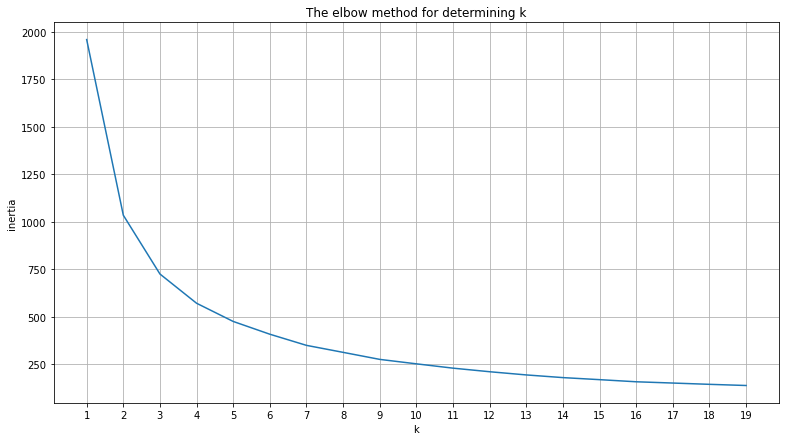

In [20]:
#  features that will be used are 'bathroom_count', 'bedroom_count','home_size_square_feet', 'lot_size_square_feet'

home_features = ['bathroom_count', 'bedroom_count', 'home_size_square_feet', 'lot_size_square_feet']

# plotting k and inertia
get_k_val_from_elbow(train_scaled, features = home_features)

In [21]:
# lets keep k as 5

# creating the object
kmeans2 = KMeans(n_clusters = 5, max_iter = 500)

# fitting the object
kmeans2.fit(train_scaled[home_features])

#predicting using the kmeans object
y_kmeans2 = kmeans2.predict(train_scaled[home_features])
y_kmeans2

array([1, 2, 0, ..., 1, 2, 0], dtype=int32)

array([[0.238862  , 0.39778791, 0.2822897 , 0.00222126],
       [0.06621982, 0.10271116, 0.09312617, 0.00617521],
       [0.23171934, 0.2186796 , 0.19760052, 0.0054793 ],
       [0.10381077, 0.27743081, 0.14445724, 0.00222212],
       [0.44752577, 0.45876289, 0.50558547, 0.0031278 ]])

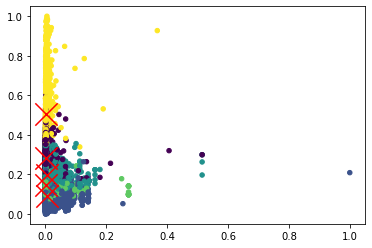

In [31]:
# ploting the centroids 
plt.scatter(train_scaled[home_features].iloc[:, 3], train_scaled[home_features].iloc[:, 2], c=y_kmeans2, s=20, cmap='viridis')
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 3], centers[:, 2], c='red', s=500, alpha=1, marker = 'x')
centers

In [23]:
# Appending cluster into the DataFrame
train_scaled['home_features_cluster'] = y_kmeans2

### Parameters for Tax Clusters

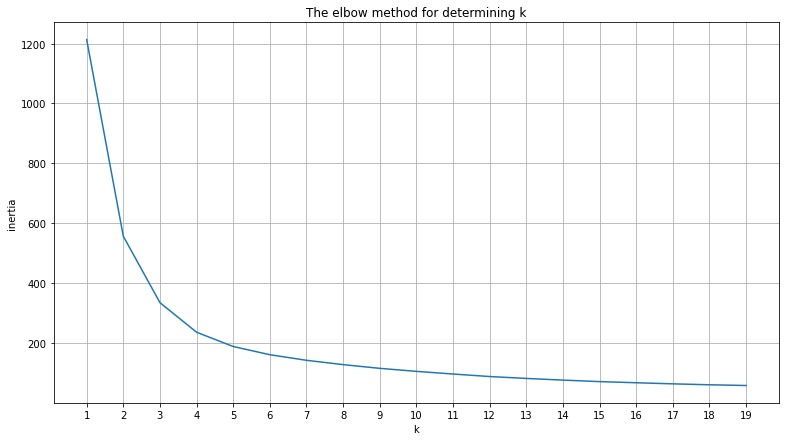

In [24]:

tax_features = ['structure_tax_value_price', 'tax_value_dollar_count', 'land_tax_value_price', 'tax_amount']

get_k_val_from_elbow(train_scaled, features = tax_features)

In [25]:
# lets keep k as 5

# creating the object
kmeans3 = KMeans(n_clusters = 5, max_iter = 500)

# fitting the object
kmeans3.fit(train_scaled[tax_features])

#predicting using the kmeans object
y_kmeans3 = kmeans3.predict(train_scaled[tax_features])
y_kmeans3

array([0, 3, 0, ..., 3, 2, 3], dtype=int32)

array([[0.03237716, 0.0352277 , 0.02194937, 0.03874133],
       [0.34231989, 0.63867626, 0.53793941, 0.59345911],
       [0.10669744, 0.17639312, 0.14133263, 0.16910669],
       [0.05890846, 0.09210069, 0.07253286, 0.09068495],
       [0.19991151, 0.33888077, 0.27315904, 0.31954167]])

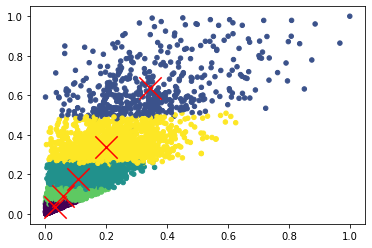

In [26]:
# lets plot the centroids

plt.scatter(train_scaled[tax_features].iloc[:, 0], train_scaled[tax_features].iloc[:, 1], c=y_kmeans3, s=20, cmap='viridis')
centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, alpha=1, marker = 'x')
centers

In [28]:
# Appending the clusters into DataFrame
train_scaled['tax_features_cluster'] = y_kmeans3

In [29]:
train_scaled.head(1)

,parcel_id,bathroom_count,bedroom_count,home_size_square_feet,fips,latitude,longitude,lot_size_square_feet,raw_census_tract_and_block,region_id_city,region_id_county,region_id_zip,year_built,structure_tax_value_price,tax_value_dollar_count,assessment_year,land_tax_value_price,tax_amount,census_tract_and_block,log_error,transaction_date,county,loc_cluster,home_features_cluster,tax_features_cluster
13527,11770180,0.0,0.125,0.077158,6037,34012117.0,-118247150.0,0.000875,6.037228e+07,12447,3101,95992,1909,0.011004,0.012657,2016,0.009779,0.015755,6.037228e+13,-0.091213,2017-03-01,Los Angeles,0,1,0
